In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data

%matplotlib inline
pd.options.display.max_rows = 99


In [2]:
pd.DataFrame(data())

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [3]:
def get_db_url(dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(env.user, env.password, env.host,dbname)

In [4]:
iris = sns.load_dataset('iris')
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Use the iris database to answer the following quesitons:

- What does the distribution of petal lengths look like?

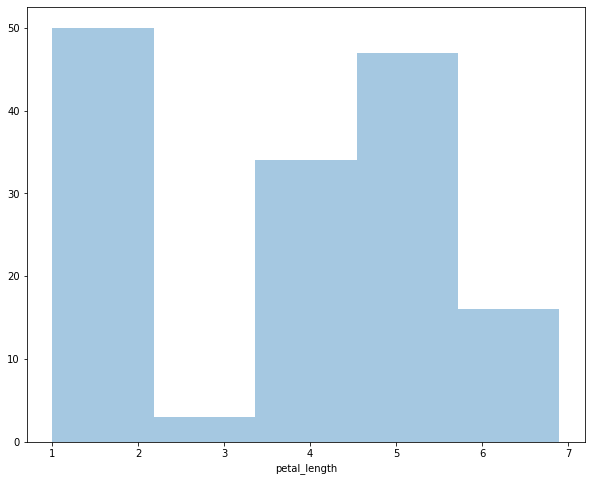

In [6]:
plt.figure(figsize=(10, 8))
sns.distplot(iris.petal_length, kde=False)

- Is there a correlation between petal length and petal width?

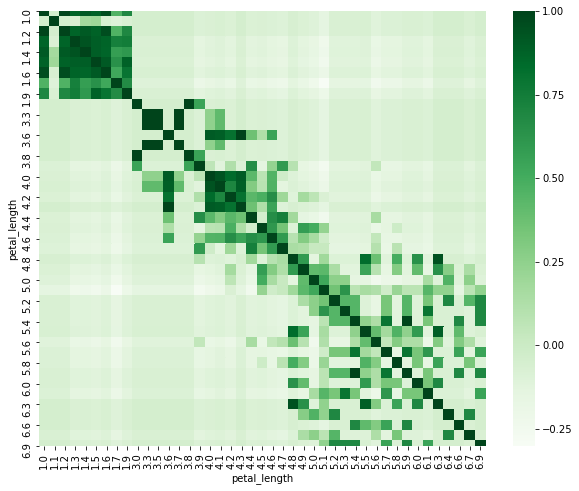

In [7]:
plt.figure(figsize=(10, 8))
iris_data = pd.crosstab(iris.petal_width, iris.petal_length)
sns.heatmap(iris_data.corr(), cmap=plt.cm.Greens)

- Would it be reasonable to predict species based on sepal width and sepal length?

<Figure size 720x576 with 0 Axes>

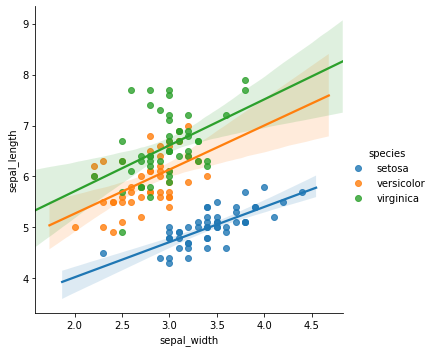

In [8]:
plt.figure(figsize=(10, 8))
sns.lmplot(data=iris, y='sepal_length', x='sepal_width', hue='species')

- Which features would be best used to predict species?

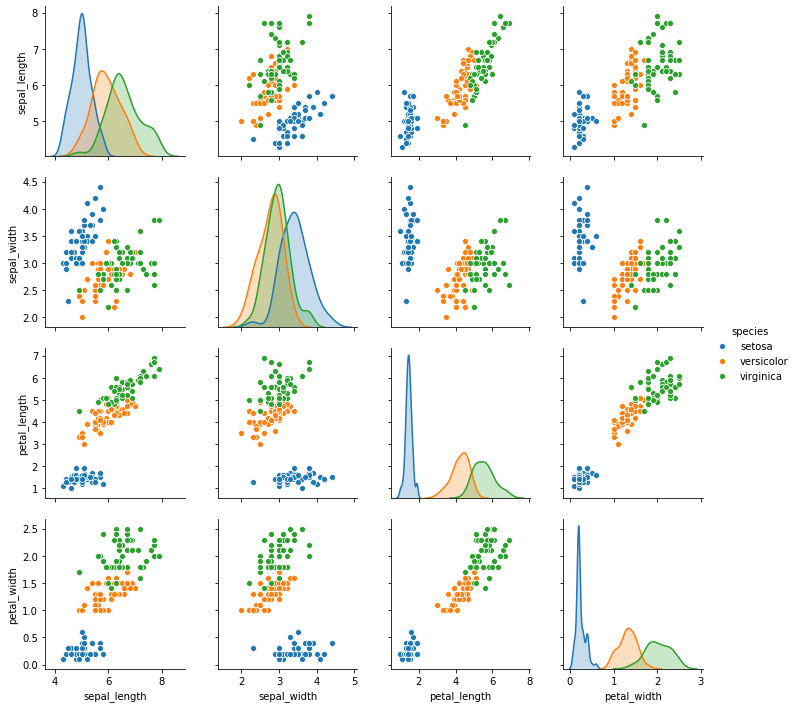

In [9]:
sns.pairplot(iris, hue='species')

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [10]:
anscombe = sns.load_dataset('anscombe')
anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [11]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

###### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

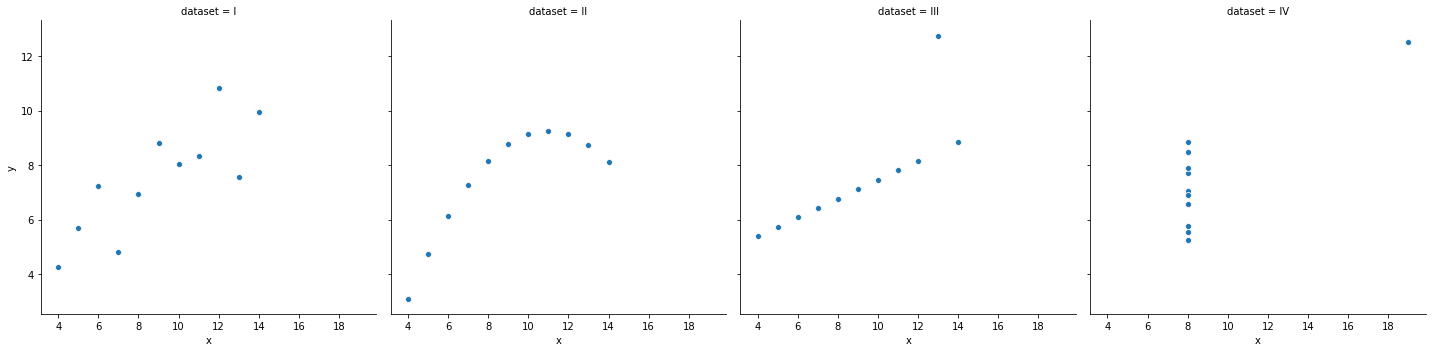

In [12]:
sns.relplot(x='x', y='y', col='dataset', data=anscombe)

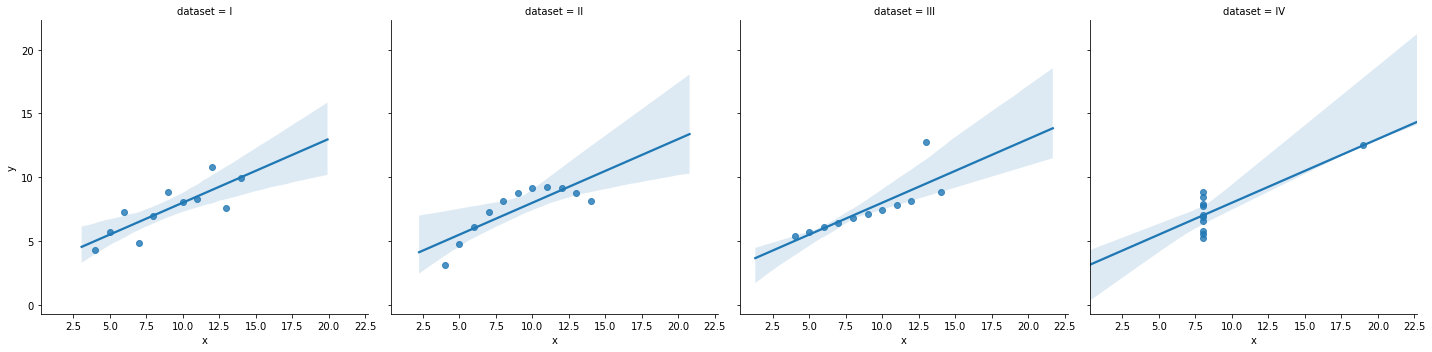

In [13]:
sns.lmplot(data=anscombe, y='y', x='x', col='dataset')

## 2. Load the InsectSprays dataset and read it's documentation. 

In [14]:
insect_sprays = data('InsectSprays')
insect_sprays.head(10)

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


In [15]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

- Create a boxplot that shows the effectiveness of the different insect sprays.

Text(0.5, 0, 'Type of Spray')

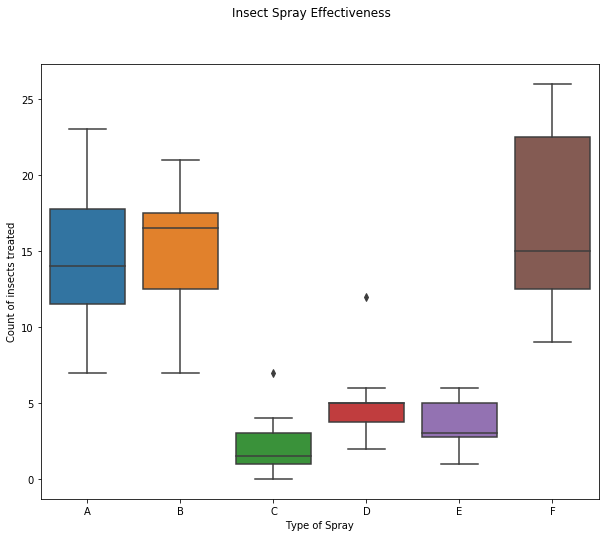

In [16]:
plt.figure(figsize=(10, 8))

sns.boxplot(data=insect_sprays, y='count', x='spray')
plt.suptitle('Insect Spray Effectiveness')
plt.ylabel("Count of insects treated")
plt.xlabel("Type of Spray")

## 3. Load the swiss dataset and read it's documentation. 
-- Create visualizations to answer the following questions:

In [17]:
swiss = data('swiss')

In [18]:
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [19]:
# provinces with greater than 75.0% are considered Catholic
def is_catholic(num):
    return num >= 60.0

In [20]:
swiss['Is_Catholic'] = swiss.Catholic.apply(is_catholic)

- Does whether or not a province is Catholic influence fertility?

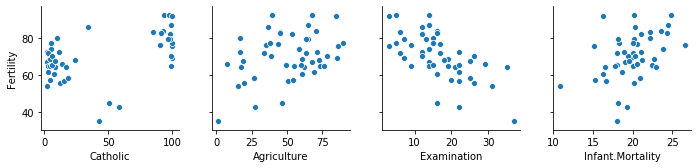

In [21]:
sns.pairplot(x_vars=['Catholic', 'Agriculture', 'Examination', 'Infant.Mortality'], y_vars='Fertility', data=swiss)

- What measure correlates most strongly with fertility?

In [22]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
Is_Catholic         0.605023
Name: Fertility, dtype: float64

ANSWER: is_catholic has the strongest correlation when considered for fertility

## 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [23]:
def get_db_url(database):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [24]:
db_name = "chipotle"
db_table = "orders"
url = get_db_url(db_name)
url
query ='SELECT * FROM orders'
chipotle = pd.read_sql(query, url)

In [25]:
def convert_to_float(str):
    return float(str.strip('$'))

chipotle["item_total"] = chipotle.item_price.apply(convert_to_float)
chipotle
# orders.item_price = orders.item_price.str.replace('$', '').str.replace(',', '').astype('float')

,id,order_id,quantity,item_name,choice_description,item_price,item_total
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98
...,...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75,11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25,11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75,8.75


In [26]:
most_popular = chipotle.groupby('item_name').quantity.agg(['count'])

In [27]:
most_popular = chipotle.groupby('item_name').item_total.agg([sum]).nlargest(n=4, columns='sum')
most_popular


,sum
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43
Steak Bowl,2260.19


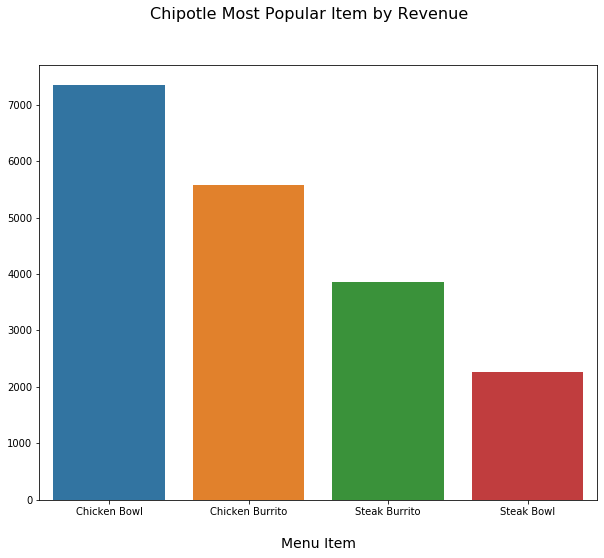

In [28]:
plt.figure(figsize=(10, 8))

sns.barplot(data=most_popular, x=most_popular.index, y='sum')

plt.suptitle('Chipotle Most Popular Item by Revenue', fontsize=16)
plt.ylabel("")
plt.xlabel("\nMenu Item", fontsize=14)

plt.show()

## 5. Load the sleepstudy data and read it's documentation. 
#### - Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [29]:
sleep = data('sleepstudy')
sleep.Subject = 'subject_' + sleep.Subject.astype(str)
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,subject_308
2,258.7047,1,subject_308
3,250.8006,2,subject_308
4,321.4398,3,subject_308
5,356.8519,4,subject_308


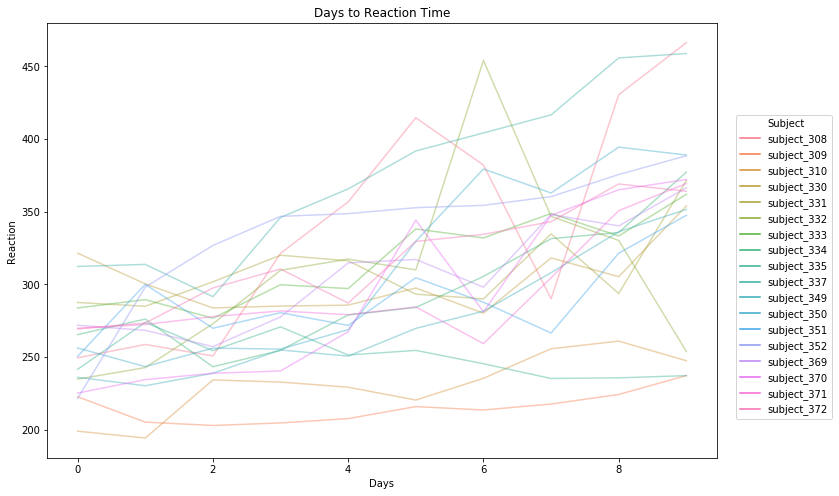

In [30]:
plt.figure(figsize=(12, 8))
plt.title("Days to Reaction Time")
sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject', alpha=.4)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=False, ncol=1)

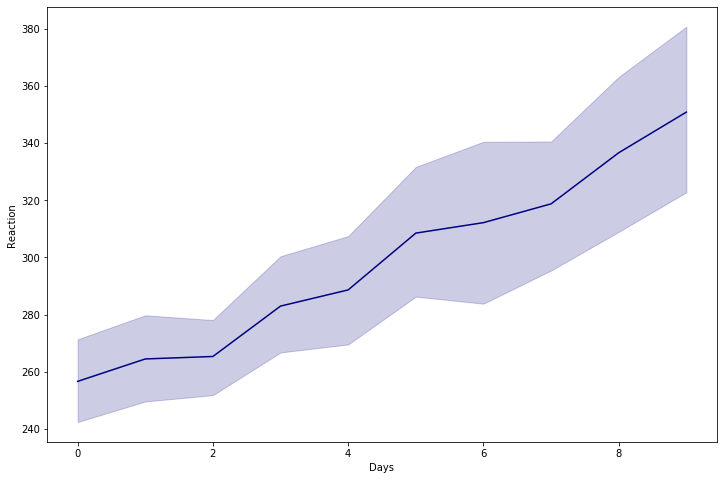

In [31]:

plt.figure(figsize=(12, 8))
sns.lineplot(data=sleep, y='Reaction', x='Days', color='navy')

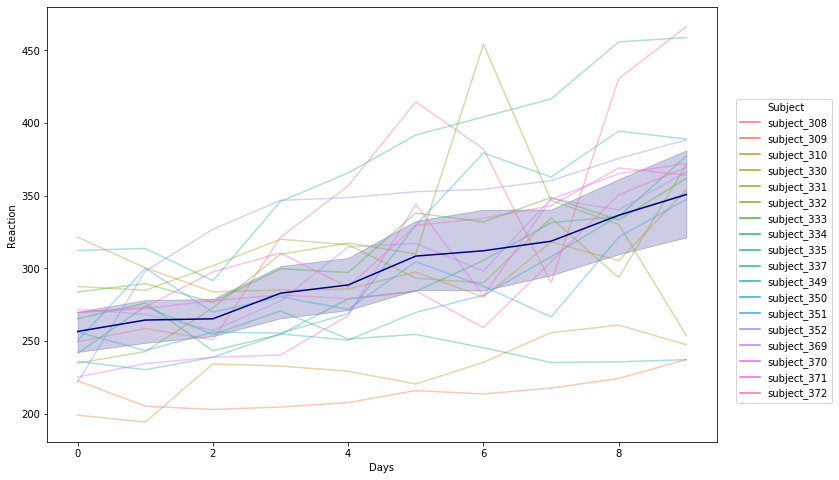

In [32]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject', alpha=.4)
sns.lineplot(data=sleep, y='Reaction', x='Days', color='navy')

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=False, ncol=1)